In [ ]:
!pip install pmdarima -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
import statsmodels.api as sm
sns.set_style("darkgrid")

In [ ]:
BTC_DF = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [ ]:
BTC_DF.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [ ]:
BTC_DF.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [ ]:
# Converting the Timestamp column from string to datetime
BTC_DF['Timestamp'] = [datetime.fromtimestamp(x) for x in BTC_DF['Timestamp']]

In [ ]:
BTC_DF.shape

(4857377, 8)

<Axes: title={'center': 'Bitcoin Weighted Price'}, xlabel='Timestamp'>

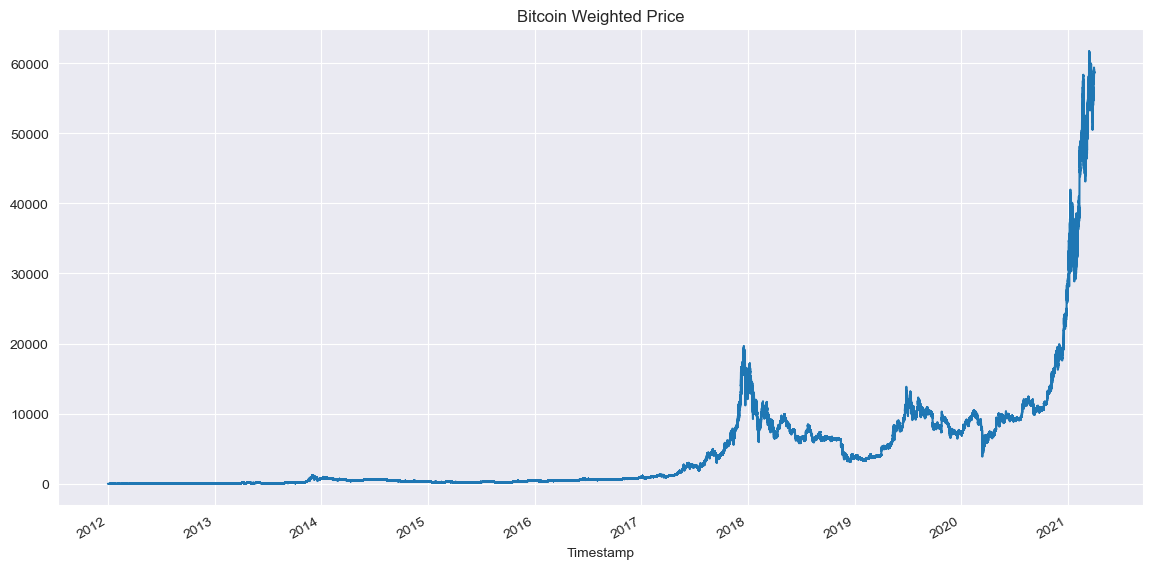

In [ ]:
BTC_DF.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

In [ ]:
#calculating missing values in the dataset

missing_values = BTC_DF.isnull().sum()
missing_per = (missing_values/BTC_DF.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

Total Missing Values  Missing %
Timestamp                             0    0.00000
Open                            1243608   25.60246
High                            1243608   25.60246
Low                             1243608   25.60246
Close                           1243608   25.60246
Volume_(BTC)                    1243608   25.60246
Volume_(Currency)               1243608   25.60246
Weighted_Price                  1243608   25.60246

In [ ]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [ ]:
fill_missing(BTC_DF)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
#created a copy
bitstamp_non_indexed = BTC_DF.copy()

In [ ]:
BTC_DF = BTC_DF.set_index('Timestamp')
BTC_DF.head()

Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                                       
2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581           2.000000   
2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046           2.436653   
2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511           2.873305   
2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977           3.309958   
2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442           3.746611   

                     Weighted_Price  
Timestamp                            
2011-12-31 13:22:00            4.39  
2011-12-31 13:23:00            4.39  
2011-12-31 13:24:00            4.39  
2011-12-31 13:25:00            4.39  
2011-12-31 13:26:00            4.39

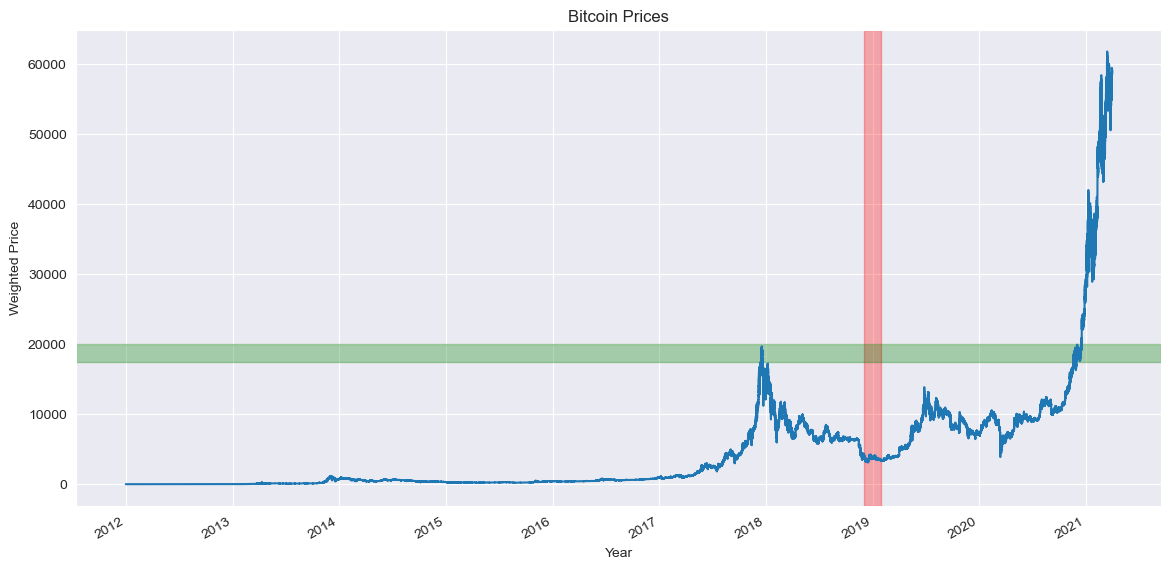

In [ ]:
ax = BTC_DF['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Weighted_Price')

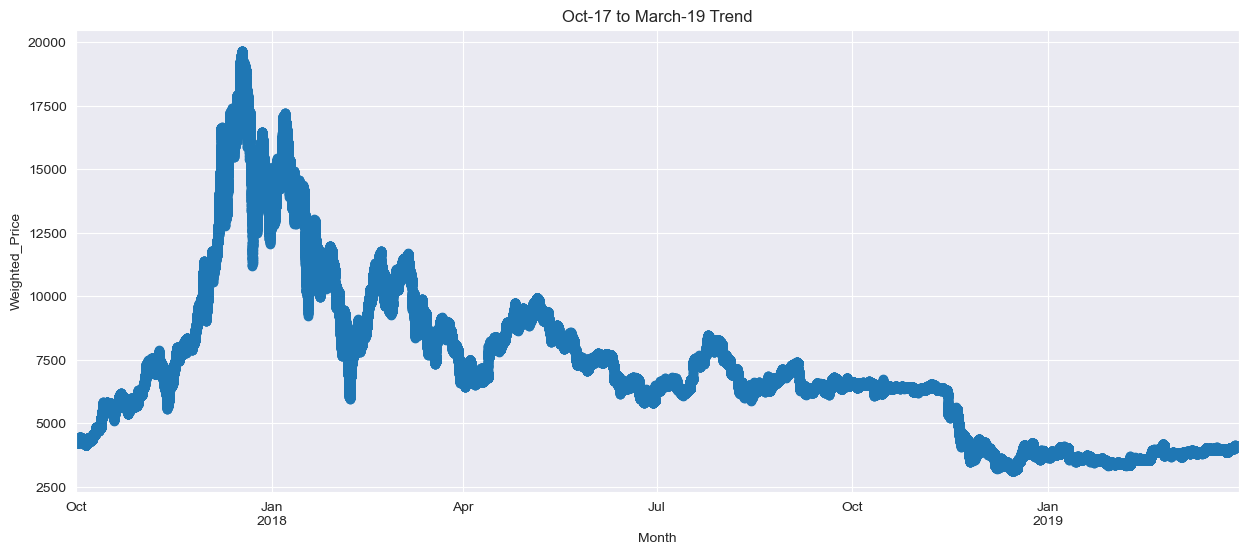

In [ ]:
#Zooming in

ax = BTC_DF.loc['2017-10':'2019-03','Weighted_Price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Weighted_Price')

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_9360\1539549472.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(BTC_DF['Weighted_Price'], shade=True)
C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weighted_Price', ylabel='Density'>

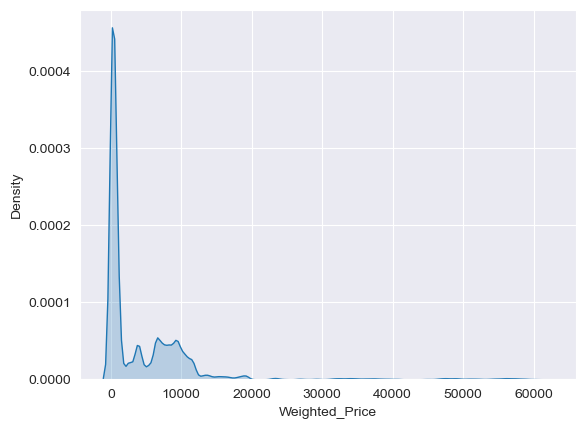

In [ ]:
sns.kdeplot(BTC_DF['Weighted_Price'], shade=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


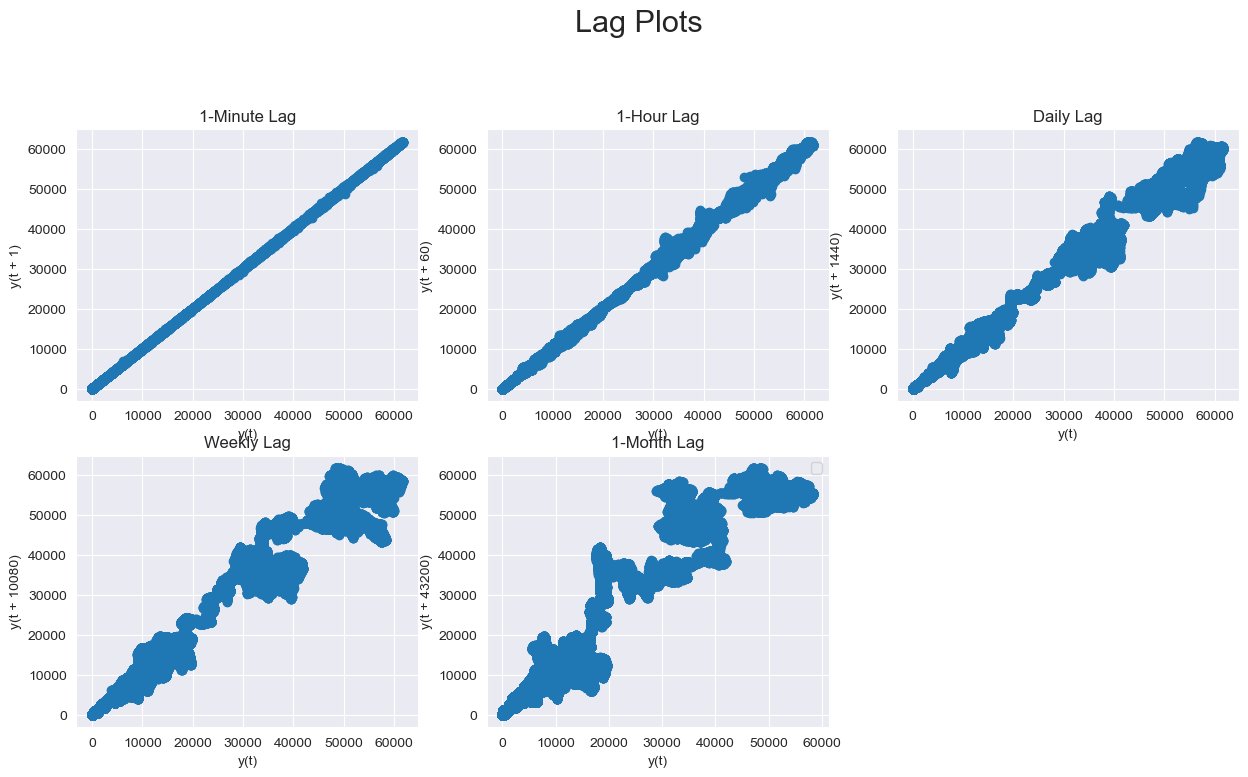

In [ ]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

In [ ]:
hourly_data = BTC_DF.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:00:00  4.39  4.39  4.39   4.39      2.295689   
1 2011-12-31 14:00:00  4.39  4.39  4.39   4.39      7.169489   
2 2011-12-31 15:00:00  4.39  4.39  4.39   4.39     13.137408   
3 2011-12-31 16:00:00  4.39  4.39  4.39   4.39     19.105327   
4 2011-12-31 17:00:00  4.39  4.39  4.39   4.39     25.073246   

   Volume_(Currency)  Weighted_Price  
0          10.078075            4.39  
1          31.474059            4.39  
2          57.673222            4.39  
3          83.872385            4.39  
4         110.071548            4.39

In [ ]:
BTC_Price_daily = BTC_DF.resample("24H").mean() #daily resampling

C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


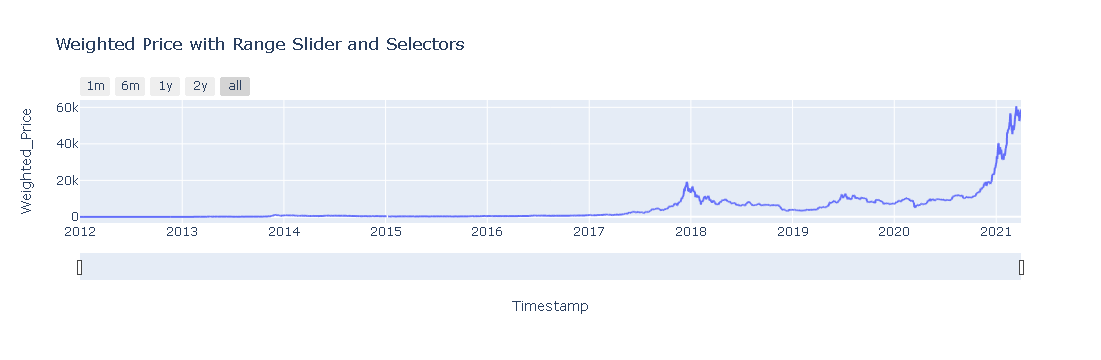

In [ ]:
import plotly.express as px

BTC_Price_daily.reset_index(inplace=True)
fig = px.line(BTC_Price_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")

        ])
    )
)
fig.show()

In [ ]:
#TIME SERIES DECOMPOSITION AND STATICAL TESTS

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
fill_missing(BTC_Price_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
1 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
3 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
4 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

   Volume_(Currency)  Weighted_Price  
0         105.980529        4.424286  
1          27.923145        4.677625  
2          67.432386        4.991701  
3          56.749845        5.175495  
4          43.510443        5.125202  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
BTC_Price_daily.Weighted_Price

0           4.424286
1           4.677625
2           4.991701
3           5.175495
4           5.125202
            ...     
3374    54788.954020
3375    56002.734323
3376    56376.937694
3377    58075.416823
3378    58758.891360
Name: Weighted_Price, Length: 3379, dtype: float64

<Figure size 1500x1200 with 0 Axes>

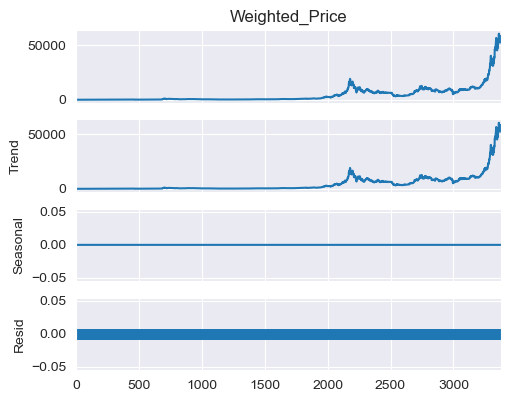

In [ ]:
plt.figure(figsize=(15,12))
series = BTC_Price_daily.Weighted_Price
result = seasonal_decompose(series, model='additive',period=1)
result.plot().set_size_inches(5, 4)

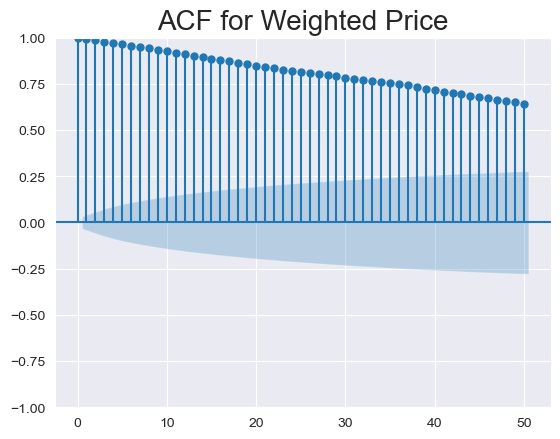

In [ ]:
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Weighted Price", size=20,)
plt.show()

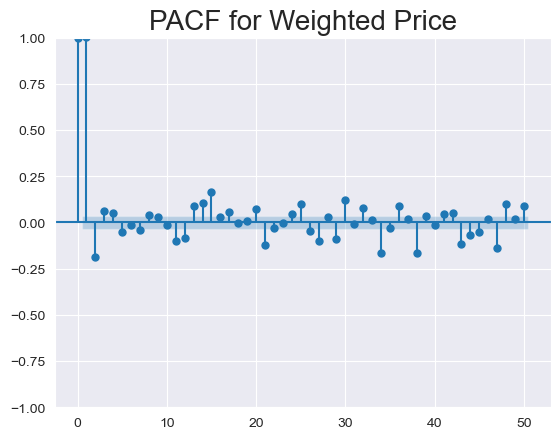

In [ ]:
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Weighted Price", size=20)
plt.show()

In [ ]:
#stationary time series

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
#adf test
stats, p, lags, critical_values = kpss(series, 'ct')

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_9360\108484339.py:2: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [ ]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print("dftest: ", dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value

    print (dfoutput)

    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [ ]:
adf_test(series)

Results of Dickey-Fuller Test:
dftest:  (6.302120534312761, 1.0, 29, 3349, {'1%': -3.432304111473485, '5%': -2.862403412310526, '10%': -2.56722961145352}, 48472.31981125205)
Test Statistic                    6.302121
p-value                           1.000000
#Lags Used                       29.000000
Number of Observations Used    3349.000000
Critical Value (1%)              -3.432304
Critical Value (5%)              -2.862403
Critical Value (10%)             -2.567230
dtype: float64
Series is Stationary


In [ ]:
#FEATURE ENGINEERING

In [ ]:
df = BTC_Price_daily.set_index("Timestamp")

In [ ]:
df.reset_index(drop=False, inplace=True)

rolling_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30

# First convert our original df to a rolling df of 3d, 7d  and 30d
df_rolled_3d = df[rolling_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[rolling_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[rolling_features].rolling(window=window3, min_periods=0)


# dataframe.shift() function Shift index by desired number of periods. It takes a scalar parameter called the period,
# which represents the number of shifts to be made over the desired axis. It defaults to 1 and
# it is shifting values vertically along the axis 0 . NaN will be filled for missing values introduced as a result of the shifting.
# Very helpful when dealing with time-series data.
# https://towardsdatascience.com/all-the-pandas-shift-you-should-know-for-data-analysis-791c1692b5e
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()


# Just print to see the structure of one of them
df_mean_30d

index          Open          High           Low         Close  \
0         0           NaN           NaN           NaN           NaN   
1         1      4.422837      4.426677      4.422837      4.426677   
2         2      4.550231      4.552151      4.550231      4.552151   
3         3      4.697388      4.698668      4.697388      4.698668   
4         4      4.816915      4.817875      4.816915      4.817875   
...     ...           ...           ...           ...           ...   
3374   3374  53206.447763  53245.227654  53167.556178  53207.530781   
3375   3375  53364.378192  53402.510297  53326.251128  53365.529760   
3376   3376  53658.228941  53694.963607  53621.648890  53659.456192   
3377   3377  53968.885871  54005.334879  53932.677167  53970.075025   
3378   3378  54394.961787  54430.840483  54359.421673  54396.251845   

      Volume_(BTC)  
0              NaN  
1        24.024874  
2        14.954117  
3        14.470437  
4        13.637000  
...            ...  
3374      3.852066  
3375      3.754108  
3376      3.594949  
3377      3.623054  
3378      3.581530  

[3379 rows x 6 columns]

In [ ]:
df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

# Just print to see the structure of one of them
df_std_30d

index         Open         High          Low        Close  Volume_(BTC)
0         0          NaN          NaN          NaN          NaN           NaN
1         1          NaN          NaN          NaN          NaN           NaN
2         2     0.180163     0.177447     0.180163     0.177447     12.827987
3         3     0.284946     0.283099     0.284946     0.283099      9.109362
4         4     0.333581     0.332071     0.333581     0.332071      7.622256
...     ...          ...          ...          ...          ...           ...
3374   3374  4435.974803  4434.057878  4437.954547  4436.182696      1.223055
3375   3375  4403.971836  4402.115028  4405.906128  4404.182498      1.250130
3376   3376  4269.649305  4268.898044  4270.343124  4269.817028      1.245602
3377   3377  4108.821654  4108.182451  4109.416624  4109.022442      1.232919
3378   3378  3831.773514  3831.207184  3831.997540  3831.768848      1.238370

[3379 rows x 6 columns]

In [ ]:
for feature in rolling_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Timestamp", drop=False, inplace=True)
df.head()

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
2012-01-01 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2012-01-02 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
2012-01-03 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
2012-01-04 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

            Volume_(Currency)  Weighted_Price  Open_mean_lag3  Open_mean_lag7  \
Timestamp                                                                       
2011-12-31         105.980529        4.424286     4564.752758     4532.014863   
2012-01-01          27.923145        4.677625        4.422837        4.422837   
2012-01-02          67.432386        4.991701        4.550231        4.550231   
2012-01-03          56.749845        5.175495        4.697388        4.697388   
2012-01-04          43.510443        5.125202        4.948274        4.816915   

            ...  Close_mean_lag30  Close_std_lag3  Close_std_lag7  \
Timestamp   ...                                                     
2011-12-31  ...       4342.158190      112.850620      186.071830   
2012-01-01  ...          4.426677      112.850620      186.071830   
2012-01-02  ...          4.552151        0.177447        0.177447   
2012-01-03  ...          4.698668        0.283099        0.283099   
2012-01-04  ...          4.817875        0.251760        0.332071   

            Close_std_lag30  Volume_(BTC)_mean_lag3  Volume_(BTC)_mean_lag7  \
Timestamp                                                                     
2011-12-31       417.775512                9.565484                9.572699   
2012-01-01       417.775512               24.024874               24.024874   
2012-01-02         0.177447               14.954117               14.954117   
2012-01-03         0.283099               14.470437               14.470437   
2012-01-04         0.332071               10.174375               13.637000   

            Volume_(BTC)_mean_lag30  Volume_(BTC)_std_lag3  \
Timestamp                                                    
2011-12-31                 9.590264               3.369452   
2012-01-01                24.024874               3.369452   
2012-01-02                14.954117              12.827987   
2012-01-03                14.470437               9.109362   
2012-01-04                13.637000               3.899942   

            Volume_(BTC)_std_lag7  Volume_(BTC)_std_lag30  
Timestamp                                                  
2011-12-31               4.136303                5.128796  
2012-01-01               4.136303                5.128796  
2012-01-02              12.827987               12.827987  
2012-01-03               9.109362                9.109362  
2012-01-04               7.622256                7.622256  

[5 rows x 38 columns]

In [ ]:
df["month"] = df.Timestamp.dt.month
df["week"] = df.Timestamp.dt.isocalendar().week
df["day"] = df.Timestamp.dt.day
df["day_of_week"] = df.Timestamp.dt.dayofweek
df.head()

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
2012-01-01 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2012-01-02 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
2012-01-03 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
2012-01-04 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

            Volume_(Currency)  Weighted_Price  Open_mean_lag3  Open_mean_lag7  \
Timestamp                                                                       
2011-12-31         105.980529        4.424286     4564.752758     4532.014863   
2012-01-01          27.923145        4.677625        4.422837        4.422837   
2012-01-02          67.432386        4.991701        4.550231        4.550231   
2012-01-03          56.749845        5.175495        4.697388        4.697388   
2012-01-04          43.510443        5.125202        4.948274        4.816915   

            ...  Volume_(BTC)_mean_lag3  Volume_(BTC)_mean_lag7  \
Timestamp   ...                                                   
2011-12-31  ...                9.565484                9.572699   
2012-01-01  ...               24.024874               24.024874   
2012-01-02  ...               14.954117               14.954117   
2012-01-03  ...               14.470437               14.470437   
2012-01-04  ...               10.174375               13.637000   

            Volume_(BTC)_mean_lag30  Volume_(BTC)_std_lag3  \
Timestamp                                                    
2011-12-31                 9.590264               3.369452   
2012-01-01                24.024874               3.369452   
2012-01-02                14.954117              12.827987   
2012-01-03                14.470437               9.109362   
2012-01-04                13.637000               3.899942   

            Volume_(BTC)_std_lag7  Volume_(BTC)_std_lag30  month  week  day  \
Timestamp                                                                     
2011-12-31               4.136303                5.128796     12    52   31   
2012-01-01               4.136303                5.128796      1    52    1   
2012-01-02              12.827987               12.827987      1     1    2   
2012-01-03               9.109362                9.109362      1     1    3   
2012-01-04               7.622256                7.622256      1     1    4   

            day_of_week  
Timestamp                
2011-12-31            5  
2012-01-01            6  
2012-01-02            0  
2012-01-03            1  
2012-01-04            2  

[5 rows x 42 columns]

In [ ]:
#MODEL BUILDING

In [ ]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (456, 42)


In [ ]:
df_train = df[df.Timestamp < "2020"]
df_valid = df[df.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (2923, 42)
validation shape : (456, 42)


In [ ]:
#ARIMA

In [ ]:
import pmdarima as pm

In [ ]:
# From df.columns, I remove all the original 8 columns i.e
# 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price',
# So I will be left with below newly created (engineered) columns
# Also

exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'month',
       'day', 'day_of_week']

# len(exogenous_features1) # 34

In [ ]:
model = pm.auto_arima(df_train.Weighted_Price, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)


model.fit(df_train.Weighted_Price, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])

df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38726.548, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38854.989, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38739.796, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38737.063, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38853.501, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38728.327, Time=1.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38740.389, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=38718.014, Time=2.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=38742.364, Time=0.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=38732.559, Time=1.79 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=38727.437, Time=4.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=38725.338, Time=3.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=38729.099, Time=1.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=38728.781, Time=2.73 sec
 ARIMA(3,1,2)(0,0,0

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_9360\183215675.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Timestamp'>

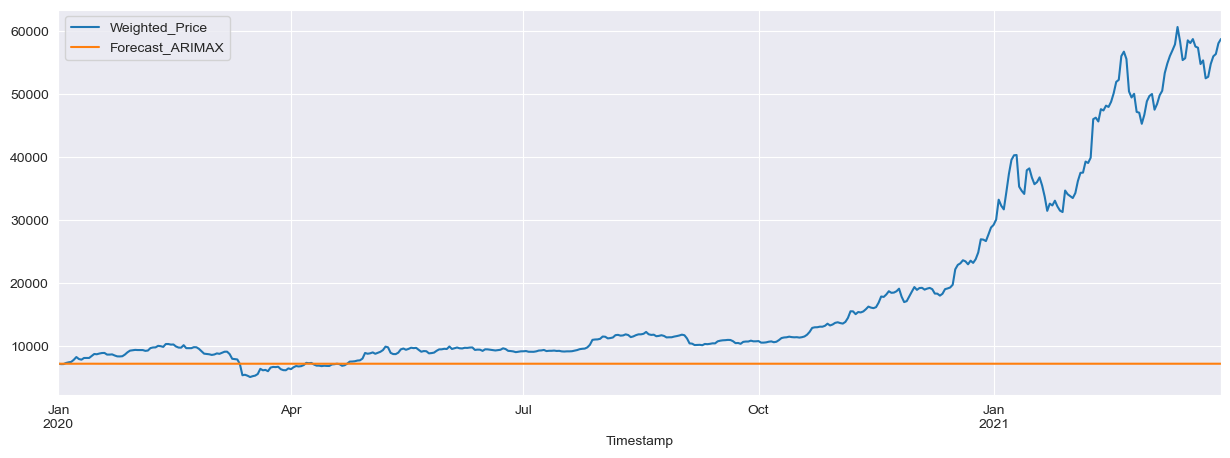

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX"]].plot(figsize=(15, 5))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX)))

print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.Weighted_Price, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 18052.527118342223

MAE of Auto ARIMAX: 10692.217013361565


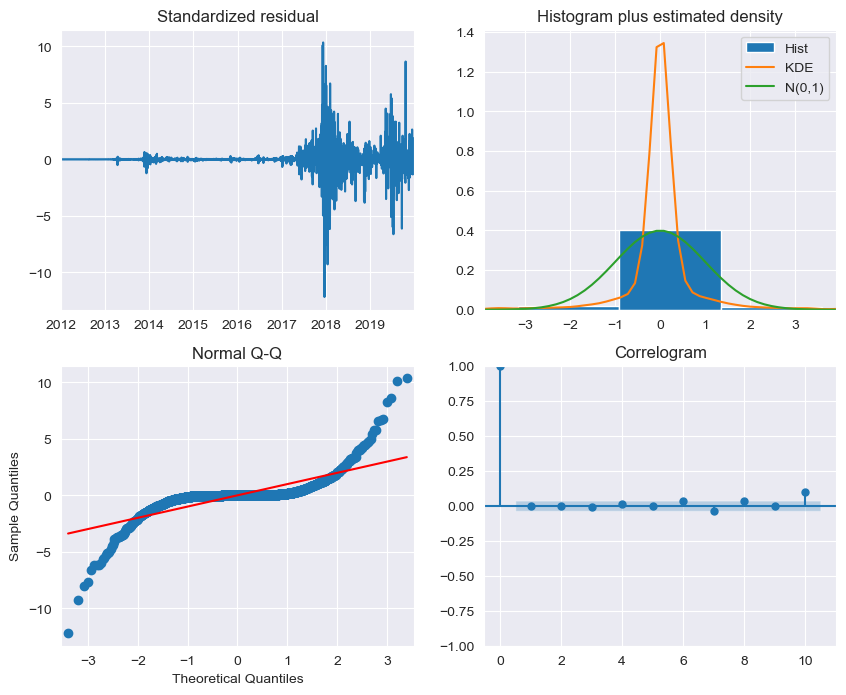

In [ ]:
model.plot_diagnostics().set_size_inches(10, 8)  # Adjust the size as needed
plt.show()

In [ ]:
#LSTM

In [ ]:
price_series = BTC_Price_daily.reset_index().Weighted_Price.values
price_series

array([4.42428590e+00, 4.67762540e+00, 4.99170099e+00, ...,
       5.63769377e+04, 5.80754168e+04, 5.87588914e+04])

In [ ]:
# Lets check what was the split of earlier train and test dataset
df_train.shape # (2923, 43)

(2923, 42)

In [ ]:
train_data, test_data = price_series[0:2923], price_series[2923:]

In [ ]:
# Feature Scaling
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range = (0, 1))

# price_series_scaled = scaler.fit_transform(price_series.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

train_data = scaler.fit_transform(train_data.reshape(-1,1))

test_data = scaler.transform(test_data.reshape(-1,1))

In [ ]:
# train_data, test_data = price_series_scaled[0:2923], price_series_scaled[2923:]

In [ ]:
train_data.shape, test_data.shape

((2923, 1), (456, 1))

In [ ]:
def get_window_ds_list_for_lstm(series, time_step):
    # Here, basically for each window, all data upto the last but one data-point
    # will be appended to as X variable and then
    # the last data-point of that window will be the Y variable (i.e. target)
    dataX, dataY = [], []
    for i in range(len(series)- time_step-1):
        a = series[i : (i+time_step), 0]
        dataX.append(a)
        b = series[i + time_step, 0]
        dataY.append(b)

    return np.array(dataX), np.array(dataY)

In [ ]:
X_train, y_train = get_window_ds_list_for_lstm(train_data, time_step=100)
X_test, y_test = get_window_ds_list_for_lstm(test_data, time_step=100)

In [ ]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2822, 100), (2822,), (355, 100), (355,))

In [ ]:
#reshape inputs to be [samples, timesteps, features] which is requred for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


print(X_train.shape)
print(X_test.shape)

(2822, 100, 1)
(355, 100, 1)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(2822,)
(355,)


In [ ]:
#Create Stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, validation_split=0.1, epochs = 50, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - loss: 8.6670e-04 - val_loss: 0.0291
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0121 - val_loss: 0.0663
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0062 - val_loss: 0.0376
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 0.0145 - val_loss: 0.0135
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 0.0177 - val_loss: 0.0194
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 0.0121 - val_loss: 0.0061
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - loss: 0.0054 - val_loss: 0.0081
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0085 - val_loss: 0.0021
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━

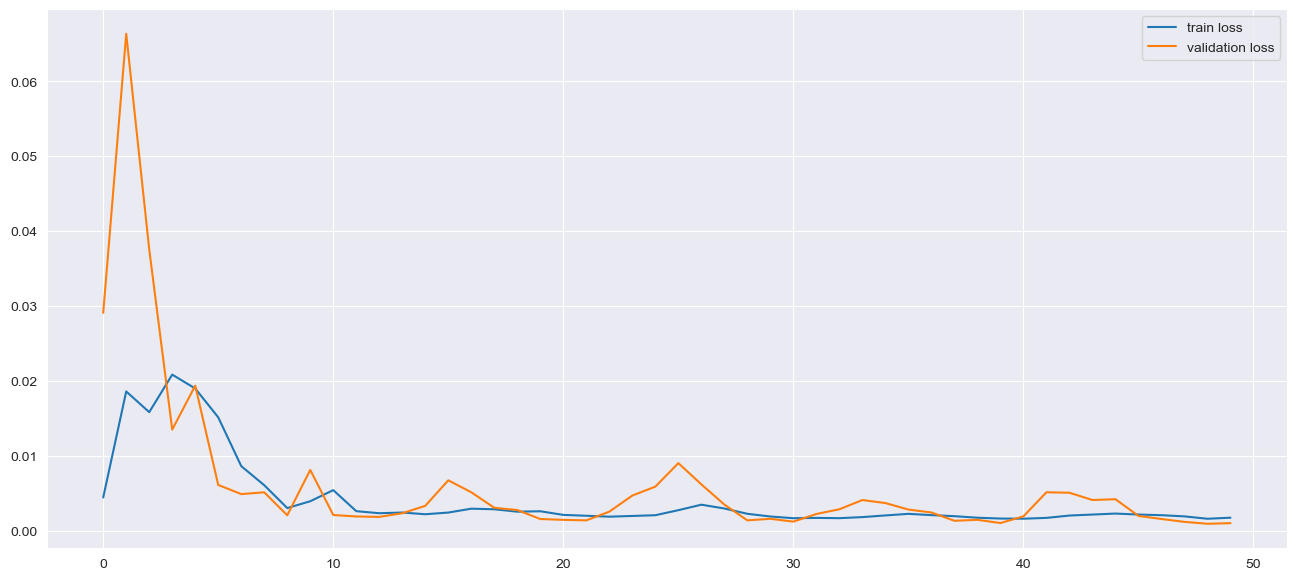

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend()

In [ ]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

train_predict_inv = scaler.inverse_transform(train_predict)
test_predict_inv = scaler.inverse_transform(test_predict)

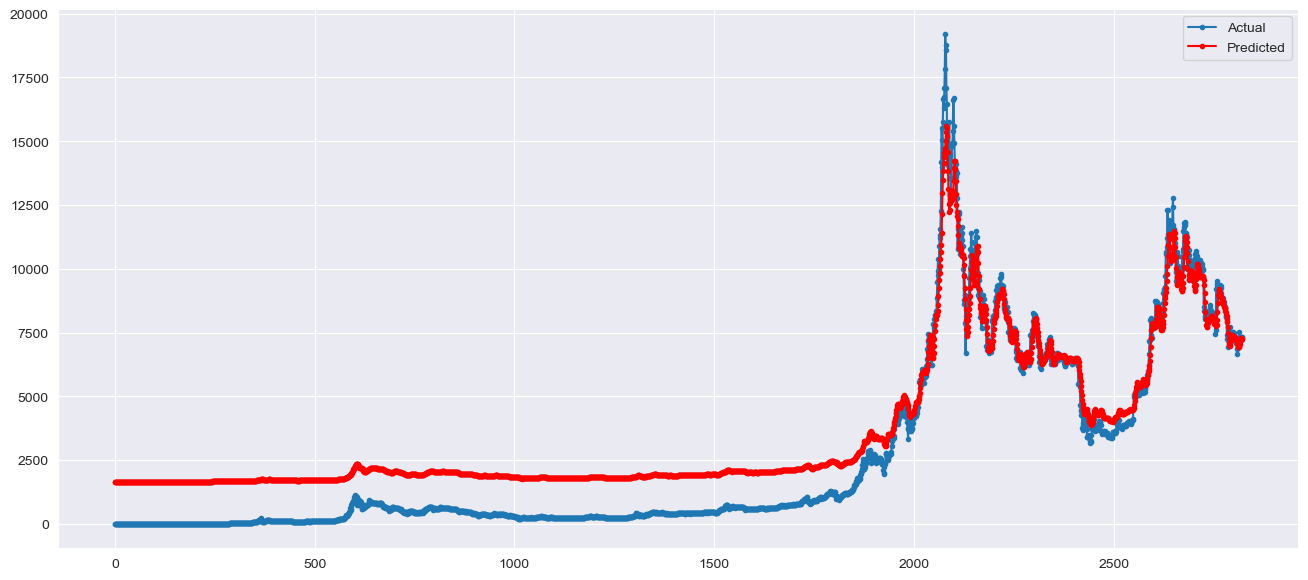

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_train_inv.flatten(), marker='.', label="Actual")
plt.plot(train_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

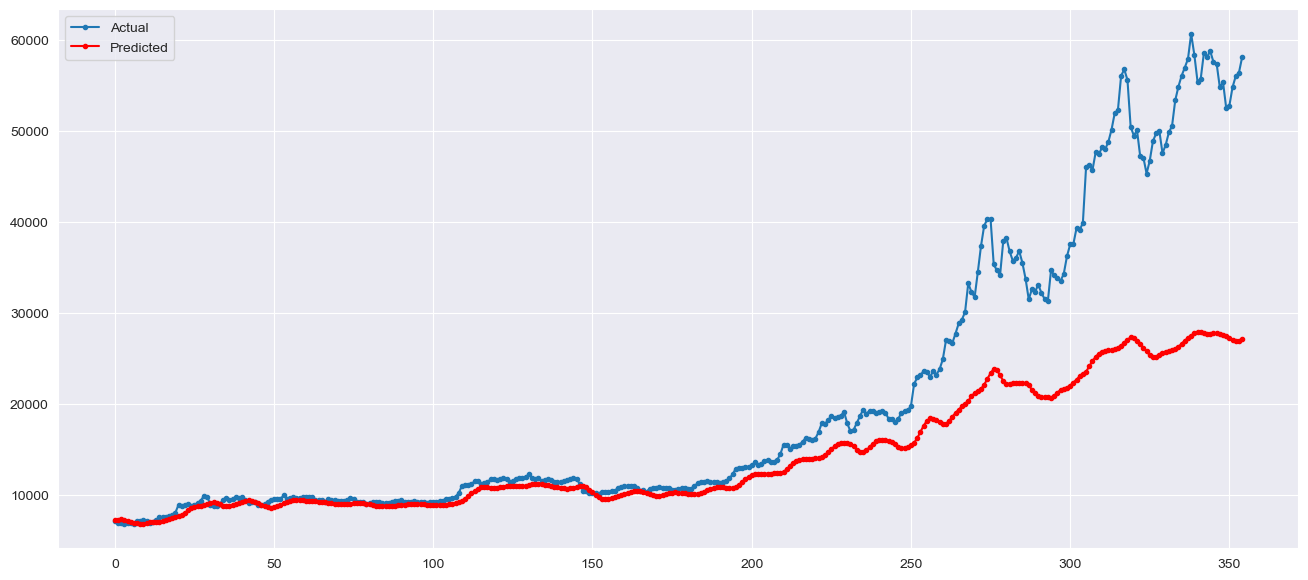

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(test_predict_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()

In [ ]:
LSTM_train_RMSE_inverse = np.sqrt(mean_squared_error(y_train_inv, train_predict_inv))
LSTM_test_RMSE_inverse = np.sqrt(mean_squared_error(y_test_inv, test_predict_inv))

LSTM_train_MAE_inverse = mean_squared_error(y_train_inv, train_predict_inv )
LSTM_test_MAE_inverse = mean_squared_error(y_test_inv, test_predict_inv )


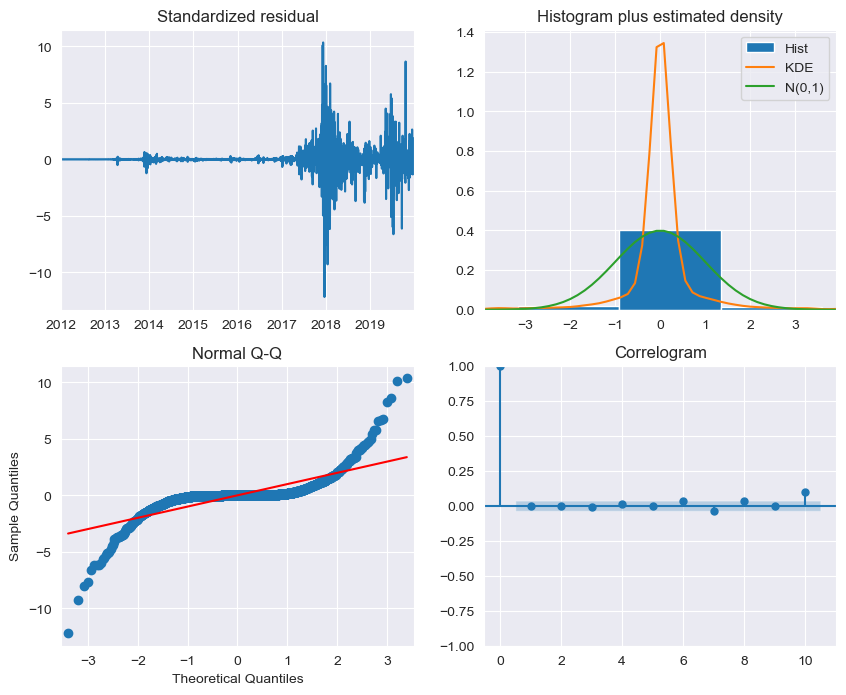

In [ ]:
model.plot_diagnostics().set_size_inches(10, 8)  # Adjust the size as needed
plt.show()

In [ ]:
#PROPHET

In [ ]:
from prophet import Prophet

In [ ]:
# Resampling originial data to day level and forward fill the missing values
daily_data = BTC_DF.resample("24H").mean() #daily resampling
fill_missing(daily_data)

                Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                          
2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         105.980529        4.424286  
2012-01-01          27.923145        4.677625  
2012-01-02          67.432386        4.991701  
2012-01-03          56.749845        5.175495  
2012-01-04          43.510443        5.125202  
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [ ]:
# Renaming the column names according to Prophet's requirements

daily_data_fb = daily_data.reset_index()[['Timestamp','Weighted_Price']].rename({'Timestamp':'ds','Weighted_Price':'y'}, axis=1)
daily_data_fb.head()

ds         y
0 2011-12-31  4.424286
1 2012-01-01  4.677625
2 2012-01-02  4.991701
3 2012-01-03  5.175495
4 2012-01-04  5.125202

In [ ]:
split_date = "2020-01-01"
train_split = daily_data_fb['ds'] <= split_date
test_split = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_split]
test_fb = daily_data_fb[test_split]

In [ ]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

train data shape : (2924, 2)
test data shape : (455, 2)


In [ ]:
model_prophet = Prophet()
for feature in exogenous_features:
    model_prophet.add_regressor(feature)

model_prophet.fit(df_train[["Timestamp", "Weighted_Price"] + exogenous_features].rename(columns={"Timestamp": "ds", "Weighted_Price": "y"}))

forecast = model_prophet.predict(df_valid[["Timestamp", "Weighted_Price"] + exogenous_features].rename(columns={"Timestamp": "ds"}))

forecast.head()

12:03:02 - cmdstanpy - INFO - Chain [1] start processing
12:03:04 - cmdstanpy - INFO - Chain [1] done processing


ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2020-01-01  2702.877325  7070.912941  7713.987519  2702.877325  2702.877325   
1 2020-01-02  2702.983911  7017.359490  7645.226868  2702.983911  2702.983911   
2 2020-01-03  2703.090497  6873.336936  7525.215148  2703.090497  2703.090497   
3 2020-01-04  2703.197083  6820.352347  7462.484494  2703.197083  2703.197083   
4 2020-01-05  2703.303669  6876.565478  7495.296844  2703.303669  2703.303669   

   Close_mean_lag3  Close_mean_lag3_lower  Close_mean_lag3_upper  \
0      3072.371173            3072.371173            3072.371173   
1      3042.349141            3042.349141            3042.349141   
2      2997.689186            2997.689186            2997.689186   
3      2979.850021            2979.850021            2979.850021   
4      3008.359587            3008.359587            3008.359587   

   Close_mean_lag30  ...     weekly  weekly_lower  weekly_upper      yearly  \
0         -0.260959  ...   0.726059      0.726059      0.726059  -55.586668   
1         -0.260709  ...  -6.347854     -6.347854     -6.347854  -72.035715   
2         -0.260368  ... -10.520293    -10.520293    -10.520293  -87.736168   
3         -0.260110  ...   7.412343      7.412343      7.412343 -102.582359   
4         -0.260116  ...   5.141867      5.141867      5.141867 -116.484028   

   yearly_lower  yearly_upper  multiplicative_terms  \
0    -55.586668    -55.586668                   0.0   
1    -72.035715    -72.035715                   0.0   
2    -87.736168    -87.736168                   0.0   
3   -102.582359   -102.582359                   0.0   
4   -116.484028   -116.484028                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  7390.766672  
1                         0.0                         0.0  7330.359539  
2                         0.0                         0.0  7197.632892  
3                         0.0                         0.0  7133.479597  
4                         0.0                         0.0  7189.611819  

[5 rows x 121 columns]

In [ ]:
df_valid["Forecast_Prophet"] = forecast.yhat.values

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_9360\3795914625.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\RISHAV RAJ SINGH\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



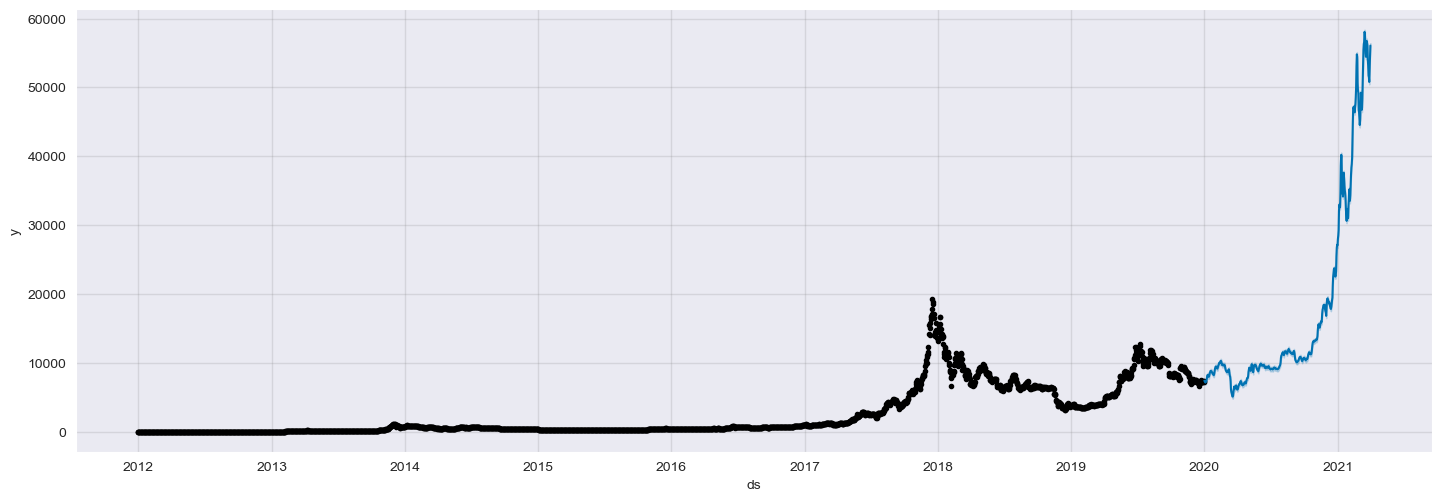

In [ ]:
# Plot Our Predictions
fig1 = model_prophet.plot(forecast)
fig1.set_size_inches(15, 5)
plt.show()


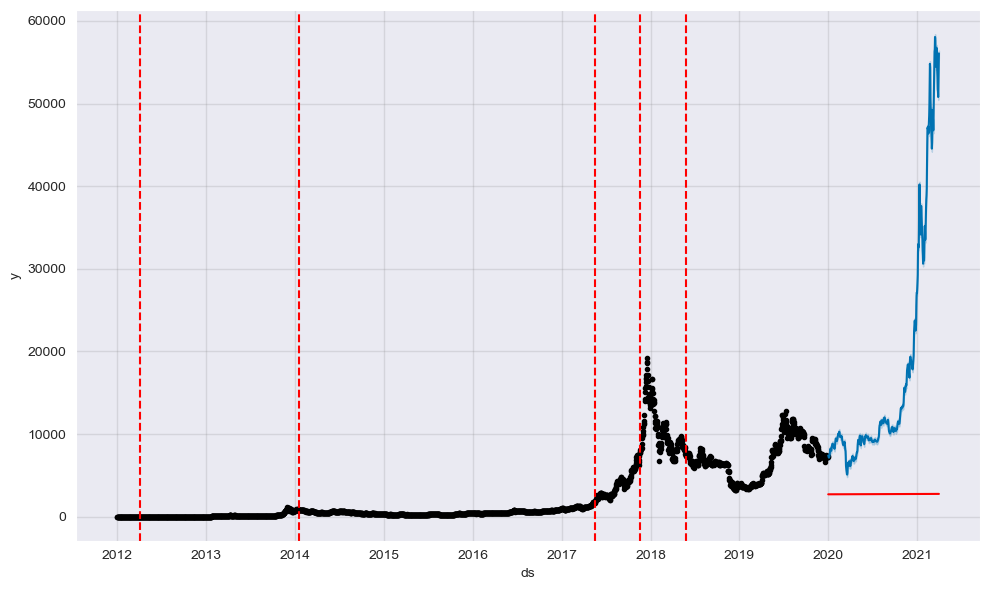

In [ ]:
# Plotting changepoints
from prophet.plot import add_changepoints_to_plot

fig = model_prophet.plot(forecast)

a = add_changepoints_to_plot(fig.gca(), model_prophet, forecast)

<Axes: xlabel='Timestamp'>

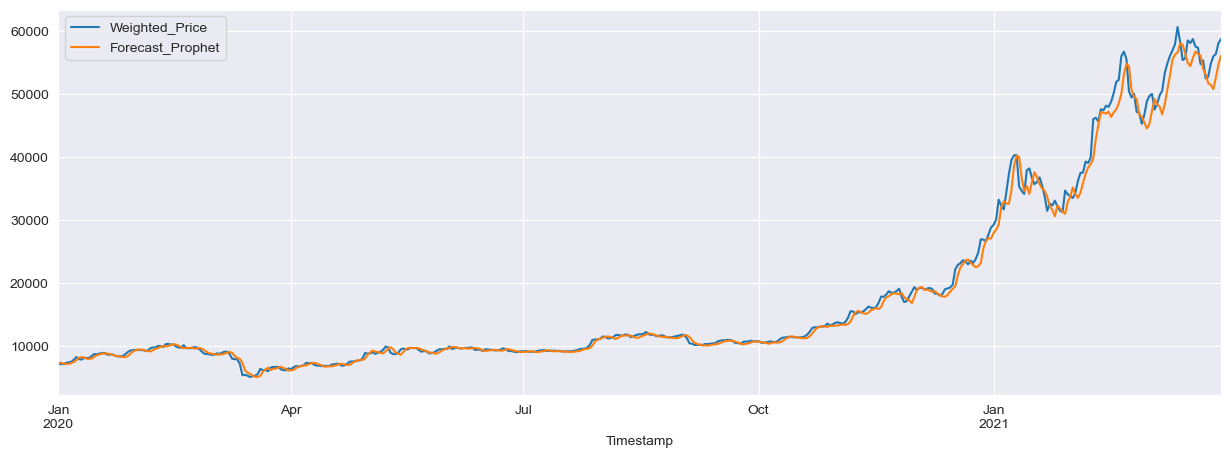

In [ ]:

df_valid[["Weighted_Price", "Forecast_Prophet"]].plot(figsize=(15, 5))

In [ ]:
test_mae_prophet = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet'])

test_rmse_prophet = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet']))

print(f"Prophet's Test MAE : {test_mae_prophet}")
print(f"Prophet's Test RMSE : {test_rmse_prophet}")

Prophet's Test MAE : 667.2904494828131
Prophet's Test RMSE : 1250.55220793491


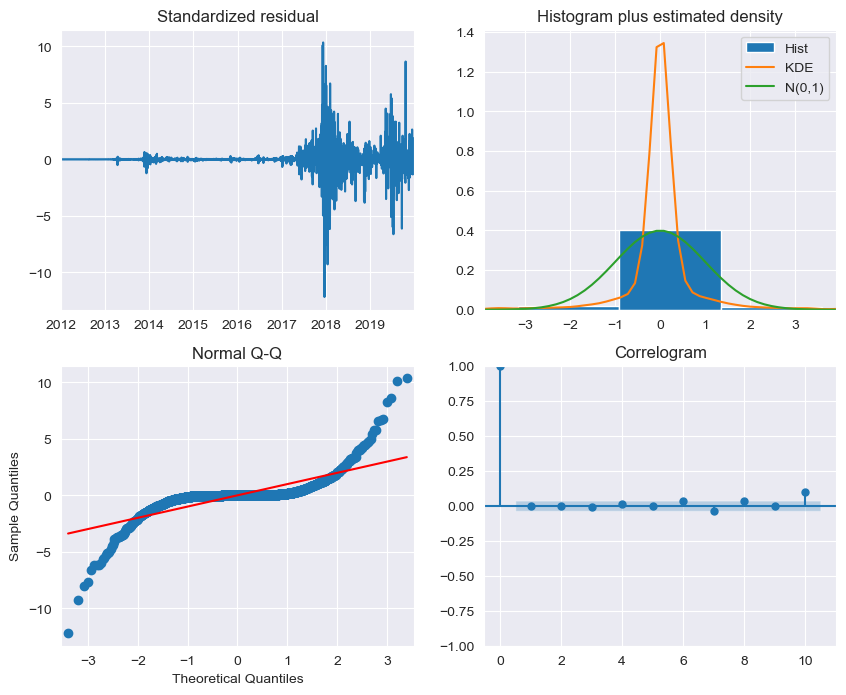

In [ ]:
model.plot_diagnostics().set_size_inches(10, 8)  # Adjust the size as needed
plt.show()

In [ ]:
#xgboost

In [ ]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

from datetime import datetime

In [ ]:
X_train, y_train = df_train[exogenous_features], df_train.Weighted_Price
X_test, y_test = df_valid[exogenous_features], df_valid.Weighted_Price

In [ ]:
reg = xgb.XGBRegressor()

In [ ]:
## Hyper Parameter Optimization Grid

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
 "max_depth"        : [1, 3, 4, 5, 6, 7],
 "n_estimators"     : [int(x) for x in np.linspace(start=100, stop=2000, num=10)],
 "min_child_weight" : [int(x) for x in np.arange(3, 15, 1)],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "subsample"        : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bytree" : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
 "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9, 1],
}

In [ ]:
model  = RandomizedSearchCV(
                reg,
                param_distributions=params,
                n_iter=10,
                n_jobs=-1,
                cv=5,
                verbose=3,
)

In [ ]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                                              0.8, 0.9, 1],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [1, 3, 4, 5, 6, 7],
                                        'min_child_weight': [3, 4, 5, 6, 7, 8,
                                                             9, 10, 11, 12, 13,
                                                             14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9, 1]},
                   verbose=3)

In [ ]:
print(f"Model Best Score : {model.best_score_}")
print(f"Model Best Parameters : {model.best_estimator_.get_params()}")

Model Best Score : -2.617796793928359
Model Best Parameters : {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.8, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 1, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.3, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 1, 'max_leaves': None, 'min_child_weight': 13, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 733, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
model.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=0.6,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.3, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
             max_leaves=None, min_child_weight=13, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=733,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_9360\3944082182.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Timestamp'>

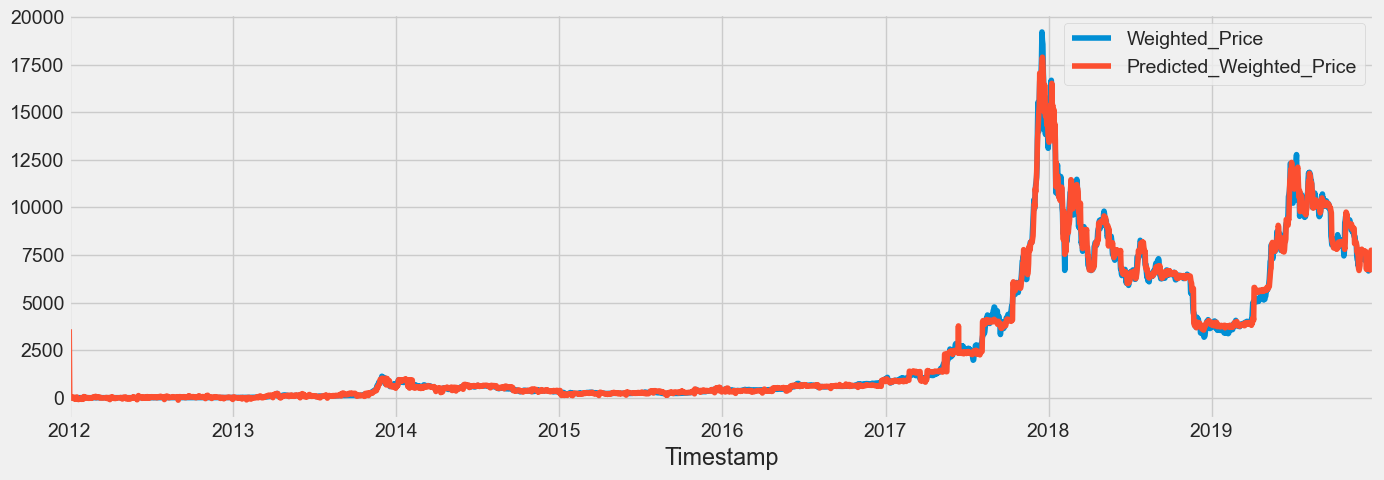

In [ ]:
df_train['Predicted_Weighted_Price'] = model.predict(X_train)

df_train[['Weighted_Price','Predicted_Weighted_Price']].plot(figsize=(15, 5))

In [ ]:
df_valid['Forecast_XGBoost'] = model.predict(X_test)

overall_data = pd.concat([df_train, df_valid], sort=False)

C:\Users\RISHAV RAJ SINGH\AppData\Local\Temp\ipykernel_9360\390820625.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Timestamp'>

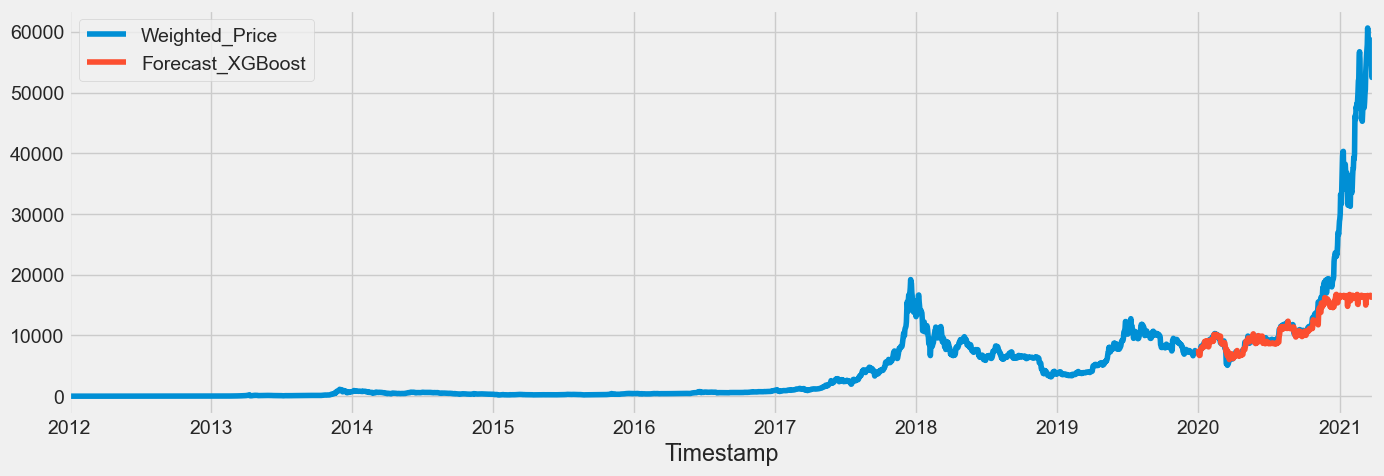

In [ ]:
overall_data[['Weighted_Price','Forecast_XGBoost']].plot(figsize=(15, 5))

<Axes: xlabel='Timestamp'>

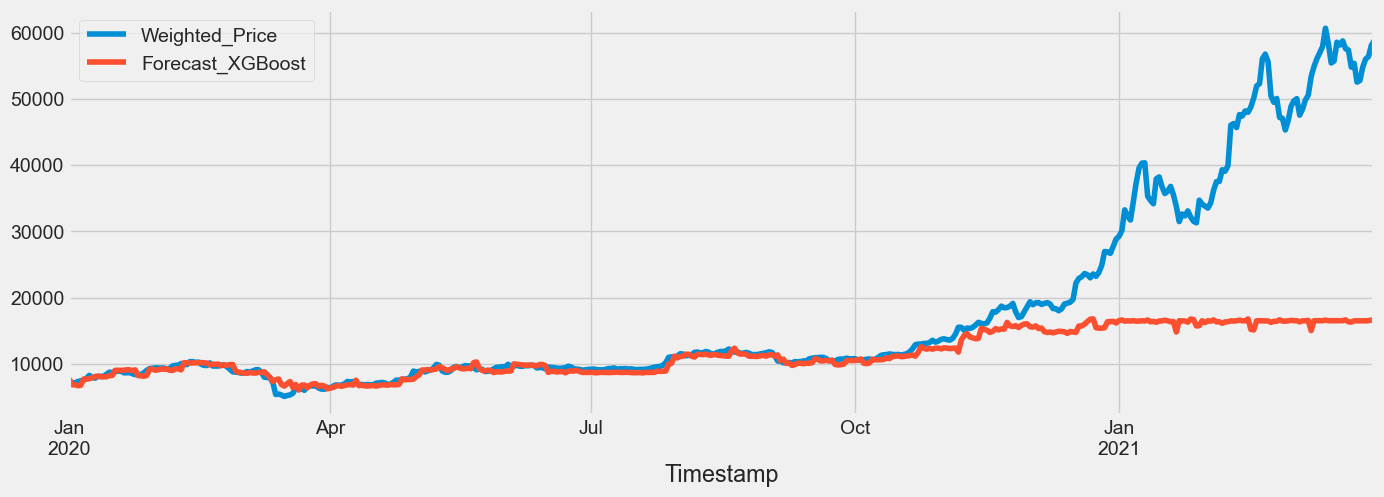

In [ ]:

df_valid[['Weighted_Price','Forecast_XGBoost']].plot(figsize=(15, 5))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
train_mae_xgboost = mean_absolute_error(df_train['Weighted_Price'], df_train['Predicted_Weighted_Price'])
train_rmse_xgboost = np.sqrt(mean_squared_error(df_train['Weighted_Price'], df_train['Predicted_Weighted_Price']))
train_r_square_xgboost = r2_score(df_train['Weighted_Price'], df_train['Predicted_Weighted_Price'])

print(f"train MAE : {train_mae_xgboost}")
print(f"train RMSE : {train_rmse_xgboost}")
print(f"train R2 : {train_r_square_xgboost}")

train MAE : 131.7916358830631
train RMSE : 247.61944622014673
train R2 : 0.9952510740230239


In [ ]:
test_mae_xgboost = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])
test_rmse_xgboost = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost']))
test_r2_xgboost = r2_score(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])

print(f"test MAE XGBOOST : {test_mae_xgboost}")
print(f"test RMSE XGBOOST : {test_rmse_xgboost}")
print(f"test R2 XGBOOST : {test_r2_xgboost}")

test MAE XGBOOST : 6493.883098142466
test RMSE XGBOOST : 13516.691558166594
test R2 XGBOOST : 0.14729853830658224


In [ ]:
#overall forecast of all model

<Axes: xlabel='Timestamp'>

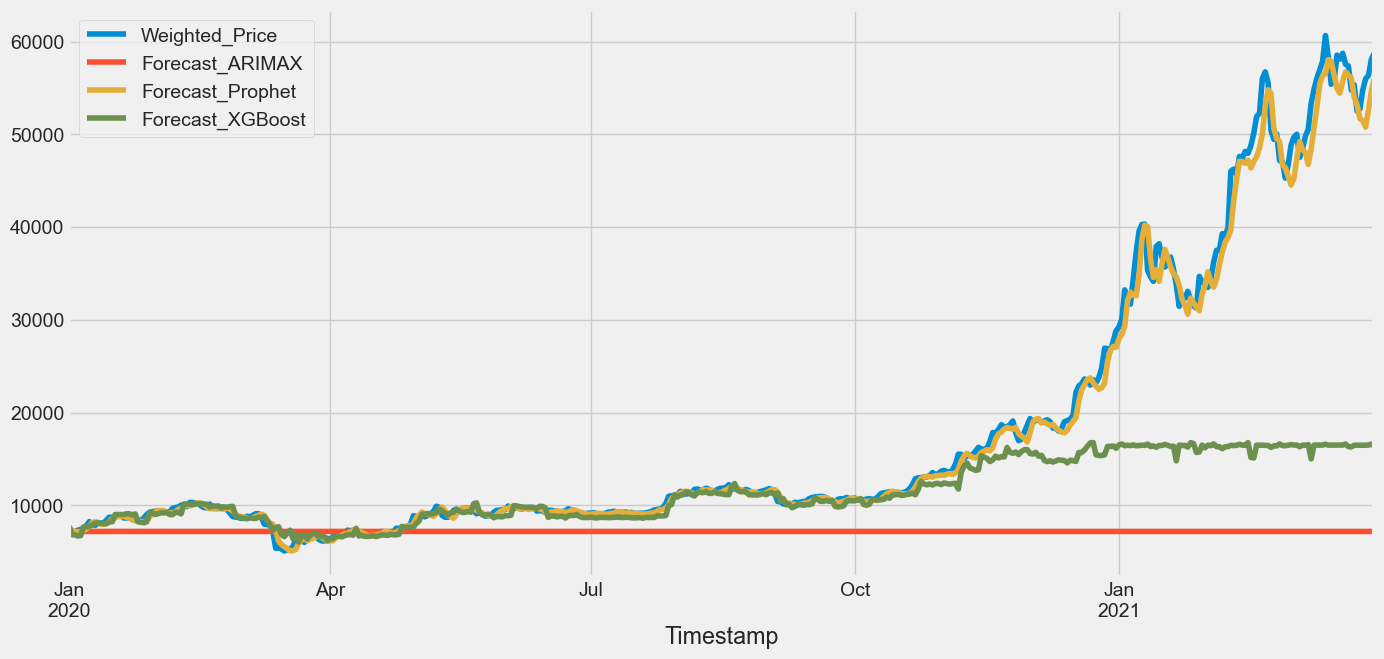

In [ ]:
df_valid[["Weighted_Price", "Forecast_ARIMAX", "Forecast_Prophet", "Forecast_XGBoost"]].plot(figsize=(15,7))

In [ ]:
arimax_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX']))

fbp_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet']))

xgb_rmse = np.sqrt(mean_squared_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost']))

# MAE

arimax_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_ARIMAX'])
fbp_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_Prophet'])
xgb_mae = mean_absolute_error(df_valid['Weighted_Price'], df_valid['Forecast_XGBoost'])

In [ ]:
#mae,rmse of all model

In [ ]:
print("ARIMAX RMSE :", arimax_rmse)
print("FB Prophet RMSE :", fbp_rmse)
print("XGBoost RMSE :", xgb_rmse)

print("\nARIMAX MAE :", arimax_mae)
print("FB Prophet MAE :", fbp_mae)
print("XGBoost MAE :", xgb_mae)


ARIMAX RMSE : 18052.527118342223
FB Prophet RMSE : 1250.55220793491
XGBoost RMSE : 13516.691558166594

ARIMAX MAE : 10692.217013361565
FB Prophet MAE : 667.2904494828131
XGBoost MAE : 6493.883098142466


In [ ]:
print(f"Train RMSE Inverse: {LSTM_train_RMSE_inverse}")
print(f"Train MAE Inverse: {LSTM_train_MAE_inverse}")

print(f"Test RMSE Inverse: {LSTM_test_RMSE_inverse}")
print(f"Test MAE Inverse: {LSTM_test_MAE_inverse}")

Train RMSE Inverse: 1305.5365683869884
Train MAE Inverse: 1704425.7313956735
Test RMSE Inverse: 10962.18539170836
Test MAE Inverse: 120169508.56218417
